In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts_ud\Resources\Data + Code\daily-total-female-births-CA.csv', parse_dates=[0])

df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


<AxesSubplot:ylabel='births'>

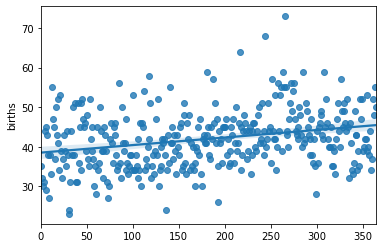

In [8]:
# regression plot

import seaborn as sns
sns.regplot(x=df.index.values, y=df['births'])

<AxesSubplot:ylabel='births'>

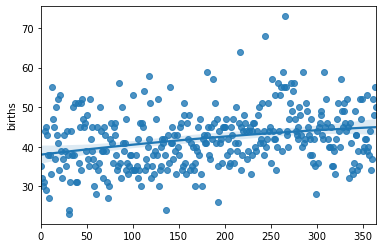

In [9]:
# regression plot with order = 2

sns.regplot(x=df.index.values, y=df['births'], order=2)

<AxesSubplot:ylabel='births'>

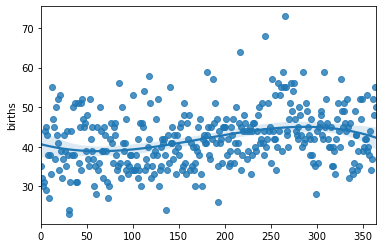

In [10]:
# regression plot with order = 3 (makes the linear relation bit more with less error)

sns.regplot(x=df.index.values, y=df['births'], order=3)

In [11]:
# yearwise summary plot (removing seasonality)

df['year'] = df['date'].dt.year

In [13]:
df.head(2)

,date,births,year
0,1959-01-01,35,1959
1,1959-01-02,32,1959


In [17]:
df.groupby('year')['births'].sum()

year
1959    15323
Name: births, dtype: int64

In [18]:
df['month'] = df['date'].dt.month

df.head(2)

,date,births,year,month
0,1959-01-01,35,1959,1
1,1959-01-02,32,1959,1


In [19]:
df.groupby('month')['births'].sum()

month
1     1213
2     1148
3     1218
4     1195
5     1208
6     1212
7     1300
8     1351
9     1446
10    1368
11    1350
12    1314
Name: births, dtype: int64

<AxesSubplot:xlabel='month'>

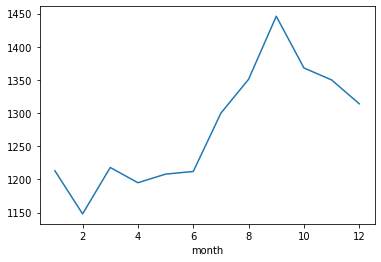

In [20]:
df.groupby('month')['births'].sum().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

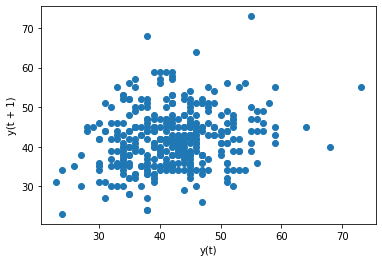

In [21]:
from pandas.plotting import lag_plot

lag_plot(df['births'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

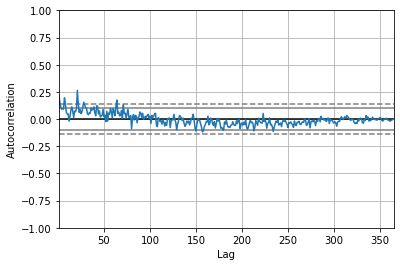

In [22]:
# autocorrelation plots (gets correlation plots with all possible lag values)

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['births'])